## Import packages, mount and access data

In [ ]:
!pip install nba_api

# Import packages and mount drive
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import sklearn as sk
import seaborn as sns
import requests
import warnings

from nba_api.stats.endpoints import leaguegamefinder
from nba_api.stats.static import teams

warnings.filterwarnings('ignore')
drive.mount("/content/drive")

# Validate the file location
!ls "/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project"

# Adjust pandas settings to display all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 2023_nba_player_stats.csv
 3_man.csv
 5_man.csv
'DSO 579-Final Project Paper.gdoc'
'DSO 579 NBA 5-Man Lineups.gslides'
'DSO 579 NBA Win Prediction.ipynb'
 lineups_data.xlsx
'LV Raiders - Jonathan Meeting Notes 11 11 24.gdoc'
 manual_lineups.xlsx
'Match_up_and_date (1).gsheet'
 Match_up_and_date.csv
 Match_up_and_date.gsheet
 merged_data.xlsx
'NBA 23-24 Season Data.gsheet'
'NBA 23-24 Season Data - Lakers.csv'
'nba 3-man_dummy_combo.ipynb'
'nba 3-man_player_combo.ipynb'
'nba 5-man DEF.ipynb'
'nba 5-man_dummy_combo.ipynb'
'nba 5-man no dummy.ipynb'
'nba 5-man_player_combo.ipynb'
 nba_lineups.ipynb
'NBA Player Performance Win Prediction Proposal.gdoc'
'NBA Players Dataset 2023.zip'
'Play making nba 5-man.ipynb'
'Slide Templates'
 X_final_output.xlsx


## Accessing Scraped 5-man Data

In [ ]:
df_dates = pd.read_csv("/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project/Match_up_and_date.csv")
df_dates = df_dates.sort_values(by='GAME DATE', ascending= True)
df_dates.head()

MATCH UP   GAME DATE  W/L
81    LAL @ DEN  2023-10-24    0
80  LAL vs. PHX  2023-10-26    1
79    LAL @ SAC  2023-10-29    0
78  LAL vs. ORL  2023-10-30    1
77  LAL vs. LAC  2023-11-01    1

In [ ]:
file_path = "/content/drive/MyDrive/Advanced Sports Analytics - DSO 579 Project/5_man.csv"
data = pd.read_csv(file_path)
data.head()

LINEUPS TEAM  GP  MIN  OFFRTG  \
0  L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   16   117.1   
1  A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    40.0   
2  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    5   187.5   
3  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   100.0   
4  A. Davis - C. Wood - T. Prince - C. Reddish - ...  LAL   1    2   133.3   

   DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  \
0   129.4   -12.3  64.3    3.00       19.1   17.6   68.8  42.4       0.1   
1   140.0  -100.0  50.0    0.33        5.9   54.5   66.7  57.1       0.3   
2   100.0    87.5  66.7    0.00       25.0  100.0   50.0  75.0       0.0   
3   160.0   -60.0  50.0    1.00       16.7   50.0  100.0  66.7       0.3   
4   116.7    16.7  66.7    0.00       25.0    0.0   75.0  50.0       0.0   

   EFG%   TS%    PACE    PIE        DATE  
0  58.6  61.4  103.72   44.1  10/24/2023  
1  15.4  15.4   93.20  -23.5  10/24/2023  
2  77.8  75.9   74.48  106.1  10/24/2023  
3  50.0  50.0   76.69    8.7  10/24/2023  
4  60.0  68.0  115.97   61.8  10/24/2023

In [ ]:
# Ensure DATE format matches between the two dataframes
df_dates['GAME DATE'] = pd.to_datetime(df_dates['GAME DATE'])
data['DATE'] = pd.to_datetime(data['DATE'])

# Extract only the opposing team's name from the MATCH UP column
df_dates['OPPOSING TEAM'] = df_dates['MATCH UP'].str.split(' ').str[-1]

# Merge the dataframes on the DATE columns
combined_df = pd.merge(
    data,
    df_dates[['GAME DATE', 'OPPOSING TEAM', 'W/L']],  # Include relevant columns
    left_on='DATE',
    right_on='GAME DATE',
    how='left'
)

# Drop unnecessary GAME DATE column if needed
combined_df.drop(columns=['GAME DATE'], inplace=True)

# Print the combined DataFrame
combined_df

LINEUPS TEAM  GP  MIN  OFFRTG  \
0     L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   16   117.1   
1     A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    40.0   
2     L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    5   187.5   
3     L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   100.0   
4     A. Davis - C. Wood - T. Prince - C. Reddish - ...  LAL   1    2   133.3   
5     A. Davis - D. Russell - R. Hachimura - G. Vinc...  LAL   1    2   120.0   
6     A. Davis - D. Russell - T. Prince - R. Hachimu...  LAL   1    2   150.0   
7     D. Russell - R. Hachimura - G. Vincent - C. Re...  LAL   1    2    50.0   
8     L. James - A. Davis - D. Russell - C. Wood - C...  LAL   1    2   200.0   
9     L. James - D. Russell - T. Prince - R. Hachimu...  LAL   1    2   100.0   
10    A. Davis - C. Wood - T. Prince - G. Vincent - ...  LAL   1    1     0.0   
11    A. Davis - D. Russell - C. Wood - G. Vincent -...  LAL   1    1     0.0   
12    A. Davis - D. Russell - C. Wood - T. Prince - ...  LAL   1    1    50.0   
13    A. Davis - R. Hachimura - G. Vincent - C. Redd...  LAL   1    1     0.0   
14    G. Vincent - C. Reddish - J. Hayes - M. Christ...  LAL   1    1   200.0   
15    L. James - A. Davis - C. Wood - C. Reddish - A...  LAL   1    1   200.0   
16    L. James - D. Russell - G. Vincent - C. Reddis...  LAL   1    1     0.0   
17    L. James - A. Davis - D. Russell - C. Wood - G...  LAL   1    0     0.0   
18    L. James - A. Davis - D. Russell - C. Wood - G...  LAL   1   10   114.3   
19    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   10   109.1   
20    A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    70.0   
21    L. James - A. Davis - C. Wood - G. Vincent - A...  LAL   1    5   133.3   
22    L. James - A. Davis - G. Vincent - C. Reddish ...  LAL   1    3   100.0   
23    L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   114.3   
24    L. James - D. Russell - R. Hachimura - G. Vinc...  LAL   1    3    57.1   
25    A. Davis - C. Wood - G. Vincent - C. Reddish -...  LAL   1    2   100.0   
26    A. Davis - D. Russell - C. Wood - T. Prince - ...  LAL   1    2    33.3   
27    A. Davis - D. Russell - R. Hachimura - G. Vinc...  LAL   1    1    75.0   
28    A. Davis - D. Russell - T. Prince - R. Hachimu...  LAL   1    1   100.0   
29    A. Davis - R. Hachimura - G. Vincent - C. Redd...  LAL   1    1     0.0   
30    D. Russell - R. Hachimura - G. Vincent - C. Re...  LAL   1    1    50.0   
31    L. James - D. Russell - G. Vincent - C. Reddis...  LAL   1    1     0.0   
32    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   15    84.8   
33    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1    9   115.0   
34    L. James - D. Russell - R. Hachimura - G. Vinc...  LAL   1    6   138.5   
35    A. Davis - C. Wood - T. Prince - R. Hachimura ...  LAL   1    4   120.0   
36    L. James - D. Russell - C. Wood - T. Prince - ...  LAL   1    4   150.0   
37    A. Davis - C. Wood - T. Prince - G. Vincent - ...  LAL   1    3   112.5   
38    A. Davis - D. Russell - R. Hachimura - G. Vinc...  LAL   1    2   150.0   
39    A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    2   100.0   
40    L. James - D. Russell - G. Vincent - C. Reddis...  LAL   1    2    50.0   
41    A. Davis - D. Russell - T. Prince - R. Hachimu...  LAL   1    1   100.0   
42    A. Davis - R. Hachimura - G. Vincent - C. Redd...  LAL   1    1    75.0   
43    L. James - A. Davis - C. Wood - T. Prince - A....  LAL   1    1     0.0   
44    L. James - A. Davis - D. Russell - C. Wood - T...  LAL   1    1   300.0   
45    L. James - A. Davis - D. Russell - R. Hachimur...  LAL   1    1   133.3   
46    L. James - A. Davis - T. Prince - G. Vincent -...  LAL   1    0     0.0   
47    L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   13    83.9   
48    L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    6   107.1  

In [ ]:
duplicates = combined_df[combined_df.duplicated(keep=False)]
duplicates

Empty DataFrame
Columns: [LINEUPS, TEAM, GP, MIN, OFFRTG, DEFRTG, NETRTG, AST%, AST/TO, AST RATIO, OREB%, DREB%, REB%, TO RATIO, EFG%, TS%, PACE, PIE, DATE, OPPOSING TEAM, W/L]
Index: []

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LINEUPS        1164 non-null   object        
 1   TEAM           1164 non-null   object        
 2   GP             1164 non-null   int64         
 3   MIN            1164 non-null   int64         
 4   OFFRTG         1164 non-null   float64       
 5   DEFRTG         1164 non-null   float64       
 6   NETRTG         1164 non-null   float64       
 7   AST%           1164 non-null   float64       
 8   AST/TO         1164 non-null   float64       
 9   AST RATIO      1164 non-null   float64       
 10  OREB%          1164 non-null   float64       
 11  DREB%          1164 non-null   float64       
 12  REB%           1164 non-null   float64       
 13  TO RATIO       1164 non-null   float64       
 14  EFG%           1164 non-null   float64       
 15  TS%            1164 n

In [ ]:
combined_df.describe()

GP          MIN       OFFRTG       DEFRTG       NETRTG  \
count  1164.0  1164.000000  1164.000000  1164.000000  1164.000000   
mean      1.0     3.414089   101.086942   108.250172    -7.163660   
min       1.0     0.000000     0.000000     0.000000  -400.000000   
25%       1.0     1.000000    66.700000    66.700000   -53.150000   
50%       1.0     2.000000   100.000000   107.400000     0.000000   
75%       1.0     4.000000   137.500000   144.500000    39.775000   
max       1.0    27.000000   300.000000   400.000000   300.000000   
std       0.0     3.781478    63.726628    64.722319    89.816489   

              AST%       AST/TO    AST RATIO        OREB%        DREB%  \
count  1164.000000  1164.000000  1164.000000  1164.000000  1164.000000   
mean     50.601632     0.831031    15.520962    19.158591    62.171478   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000    33.300000   
50%      50.000000     0.000000    16.700000     0.000000    70.700000   
75%     100.000000     1.000000    25.000000    33.300000   100.000000   
max     100.000000    13.000000    50.000000   100.000000   100.000000   
std      39.534934     1.411589    12.816507    27.281388    37.971190   

              REB%     TO RATIO         EFG%          TS%         PACE  \
count  1164.000000  1164.000000  1164.000000  1164.000000  1164.000000   
mean     45.822852     0.124914    50.998282    55.395017   130.926916   
min       0.000000     0.000000     0.000000     0.000000    59.380000   
25%      33.300000     0.000000    28.600000    34.700000    97.300000   
50%      50.000000     0.100000    50.000000    58.000000   106.670000   
75%      60.000000     0.200000    70.950000    75.000000   120.000000   
max     100.000000     1.000000   150.000000   150.000000  7200.000000   
std      28.146013     0.162254    35.428332    33.529722   230.047812   

               PIE                           DATE          W/L  
count  1164.000000                           1164  1164.000000  
mean     41.290034  2024-01-17 02:18:33.402061824     0.576460  
min   -1100.000000            2023-10-24 00:00:00     0.000000  
25%      16.700000            2023-12-02 00:00:00     0.000000  
50%      48.700000            2024-01-15 00:00:00     1.000000  
75%      73.400000            2024-03-02 00:00:00     1.000000  
max     700.000000            2024-04-14 00:00:00     1.000000  
std      95.689384                            NaN     0.494332

## Data Cleaning

In [ ]:
combined_df.head()

LINEUPS TEAM  GP  MIN  OFFRTG  \
0  L. James - A. Davis - D. Russell - T. Prince -...  LAL   1   16   117.1   
1  A. Davis - T. Prince - R. Hachimura - G. Vince...  LAL   1    5    40.0   
2  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    5   187.5   
3  L. James - D. Russell - C. Wood - G. Vincent -...  LAL   1    3   100.0   
4  A. Davis - C. Wood - T. Prince - C. Reddish - ...  LAL   1    2   133.3   

   DEFRTG  NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  \
0   129.4   -12.3  64.3    3.00       19.1   17.6   68.8  42.4       0.1   
1   140.0  -100.0  50.0    0.33        5.9   54.5   66.7  57.1       0.3   
2   100.0    87.5  66.7    0.00       25.0  100.0   50.0  75.0       0.0   
3   160.0   -60.0  50.0    1.00       16.7   50.0  100.0  66.7       0.3   
4   116.7    16.7  66.7    0.00       25.0    0.0   75.0  50.0       0.0   

   EFG%   TS%    PACE    PIE       DATE OPPOSING TEAM  W/L  
0  58.6  61.4  103.72   44.1 2023-10-24           DEN    0  
1  15.4  15.4   93.20  -23.5 2023-10-24           DEN    0  
2  77.8  75.9   74.48  106.1 2023-10-24           DEN    0  
3  50.0  50.0   76.69    8.7 2023-10-24           DEN    0  
4  60.0  68.0  115.97   61.8 2023-10-24           DEN    0

In [ ]:
#To list the columns in the data
combined_df.columns

Index(['LINEUPS', 'TEAM', 'GP', 'MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%',
       'AST/TO', 'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%',
       'TS%', 'PACE', 'PIE', 'DATE', 'OPPOSING TEAM', 'W/L'],
      dtype='object')

In [ ]:
#List of columns
manual_drop = ["TEAM", "GP", "DATE", "OPPOSING TEAM"]

# Drop the specified columns
cleaned_data = combined_df.drop(columns=manual_drop, errors='ignore')
cleaned_data.head()

LINEUPS  MIN  OFFRTG  DEFRTG  \
0  L. James - A. Davis - D. Russell - T. Prince -...   16   117.1   129.4   
1  A. Davis - T. Prince - R. Hachimura - G. Vince...    5    40.0   140.0   
2  L. James - D. Russell - C. Wood - G. Vincent -...    5   187.5   100.0   
3  L. James - D. Russell - C. Wood - G. Vincent -...    3   100.0   160.0   
4  A. Davis - C. Wood - T. Prince - C. Reddish - ...    2   133.3   116.7   

   NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  EFG%   TS%  \
0   -12.3  64.3    3.00       19.1   17.6   68.8  42.4       0.1  58.6  61.4   
1  -100.0  50.0    0.33        5.9   54.5   66.7  57.1       0.3  15.4  15.4   
2    87.5  66.7    0.00       25.0  100.0   50.0  75.0       0.0  77.8  75.9   
3   -60.0  50.0    1.00       16.7   50.0  100.0  66.7       0.3  50.0  50.0   
4    16.7  66.7    0.00       25.0    0.0   75.0  50.0       0.0  60.0  68.0   

     PACE    PIE  W/L  
0  103.72   44.1    0  
1   93.20  -23.5    0  
2   74.48  106.1    0  
3   76.69    8.7    0  
4  115.97   61.8    0

In [ ]:
# Count occurrences of each lineup
lineup_counts = cleaned_data['LINEUPS'].value_counts()

# Filter for lineups that appear at least 2 times
#filtered_lineups = lineup_counts[lineup_counts > 4].index

# Display the filtered lineup counts
len(lineup_counts)

414

In [ ]:
mean_value = lineup_counts.mean()
mean_value

2.8115942028985508

In [ ]:
# Count occurrences of each lineup
lineup_counts = cleaned_data['LINEUPS'].value_counts()

# Filter for lineups that appear at least 2 times
filtered_lineups = lineup_counts[lineup_counts > 4].index

# Display the filtered lineup counts
len(filtered_lineups)

64

In [ ]:
# Filter the DataFrame to keep only rows with valid GROUP_IDs
filtered_data = cleaned_data[cleaned_data['LINEUPS'].isin(filtered_lineups)]

# Display the filtered data
filtered_data.reset_index(inplace=True, drop=True)
filtered_data

LINEUPS  MIN  OFFRTG  DEFRTG  \
0    L. James - A. Davis - D. Russell - T. Prince -...   16   117.1   129.4   
1    A. Davis - D. Russell - T. Prince - R. Hachimu...    2   150.0   140.0   
2    L. James - D. Russell - T. Prince - R. Hachimu...    2   100.0    33.3   
3    A. Davis - D. Russell - C. Wood - T. Prince - ...    1    50.0   200.0   
4    L. James - A. Davis - D. Russell - T. Prince -...   10   109.1   117.4   
5    A. Davis - D. Russell - C. Wood - T. Prince - ...    2    33.3   150.0   
6    A. Davis - D. Russell - T. Prince - R. Hachimu...    1   100.0   100.0   
7    L. James - A. Davis - D. Russell - T. Prince -...   15    84.8   131.3   
8    A. Davis - C. Wood - T. Prince - R. Hachimura ...    4   120.0    90.0   
9    L. James - A. Davis - C. Wood - T. Prince - A....    1     0.0    25.0   
10   L. James - A. Davis - D. Russell - C. Wood - T...    1   300.0     0.0   
11   L. James - A. Davis - D. Russell - T. Prince -...   13    83.9   100.0   
12   A. Davis - D. Russell - T. Prince - C. Reddish...    4   100.0   177.8   
13   A. Davis - D. Russell - C. Wood - T. Prince - ...    3   140.0   120.0   
14   L. James - A. Davis - D. Russell - C. Wood - T...    3   160.0   100.0   
15   L. James - A. Davis - D. Russell - C. Reddish ...   15   130.3   146.7   
16   L. James - C. Wood - J. Hayes - A. Reaves - M....    5   110.0   136.4   
17   L. James - A. Davis - C. Wood - A. Reaves - M....    3   100.0    71.4   
18   L. James - A. Davis - D. Russell - A. Reaves -...    2   100.0   133.3   
19   A. Davis - C. Wood - C. Reddish - A. Reaves - ...    1     0.0     0.0   
20   L. James - A. Davis - D. Russell - C. Reddish ...   11   134.8   133.3   
21   L. James - C. Wood - J. Hayes - A. Reaves - M....    3   150.0    25.0   
22   A. Davis - C. Wood - C. Reddish - A. Reaves - ...    1     0.0   166.7   
23   L. James - A. Davis - D. Russell - T. Prince -...   11   139.1   130.4   
24   L. James - D. Russell - C. Wood - T. Prince - ...    7   100.0   100.0   
25   A. Davis - C. Wood - C. Reddish - A. Reaves - ...    6    58.3   108.3   
26   L. James - A. Davis - D. Russell - C. Reddish ...    1     0.0   100.0   
27   L. James - A. Davis - T. Prince - A. Reaves - ...    1   133.3   100.0   
28   L. James - D. Russell - C. Wood - T. Prince - ...   12    80.8   142.3   
29   L. James - D. Russell - T. Prince - R. Hachimu...    4   125.0   142.9   
30   L. James - A. Davis - D. Russell - T. Prince -...   11   125.0   112.5   
31   L. James - A. Davis - D. Russell - T. Prince -...    6   115.4   123.1   
32   A. Davis - D. Russell - C. Wood - T. Prince - ...    5   100.0   100.0   
33   L. James - A. Davis - T. Prince - C. Reddish -...    5   100.0   155.6   
34   L. James - R. Hachimura - C. Reddish - J. Haye...    3   116.7   133.3   
35   A. Davis - C. Wood - T. Prince - R. Hachimura ...    2    50.0    20.0   
36   A. Davis - D. Russell - T. Prince - R. Hachimu...    1   166.7   100.0   
37   L. James - A. Davis - R. Hachimura - C. Reddis...    1   100.0   150.0   
38   L. James - A. Davis - T. Prince - R. Hachimura...    1   100.0   133.3   
39   L. James - D. Russell - C. Wood - T. Prince - ...    1   250.0   100.0   
40   L. James - D. Russell - R. Hachimura - C. Redd...    1     0.0    50.0   
41   L. James - D. Russell - R. Hachimura - J. Haye...    1     0.0   250.0   
42   A. Davis - D. Russell - T. Prince - R. Hachimu...    0   150.0   100.0   
43   L. James - A. Davis - C. Wood - T. Prince - A....    0     0.0   200.0   
44   A. Davis - D. Russell - T. Prince - R. Hachimu...   20   114.0   112.2   
45   A. Davis - D. Russell - R. Hachimura - C. Redd...    7   142.9    87.5   
46   A. Davis - C. Wood - T. Prince - A. Reaves - M...    5   136.4   136.4   
47   A. Davis - T. Prince - R. Hachimura - C. Reddi...    5   127.3    81.8   
48   A. Davis - D. Russell - R. Hachimura - A. Reav...    2   125.0    50.0   
49   A. Davis - C. Wood - C. Reddish - A. Reaves - ...    1   133.3   100.0   
50   A. Davis - D.

In [ ]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LINEUPS    577 non-null    object 
 1   MIN        577 non-null    int64  
 2   OFFRTG     577 non-null    float64
 3   DEFRTG     577 non-null    float64
 4   NETRTG     577 non-null    float64
 5   AST%       577 non-null    float64
 6   AST/TO     577 non-null    float64
 7   AST RATIO  577 non-null    float64
 8   OREB%      577 non-null    float64
 9   DREB%      577 non-null    float64
 10  REB%       577 non-null    float64
 11  TO RATIO   577 non-null    float64
 12  EFG%       577 non-null    float64
 13  TS%        577 non-null    float64
 14  PACE       577 non-null    float64
 15  PIE        577 non-null    float64
 16  W/L        577 non-null    int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 76.8+ KB


In [ ]:
filtered_data.columns

Index(['LINEUPS', 'MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE', 'W/L'],
      dtype='object')

In [ ]:

filtered_data.rename(columns={'W/L': 'WIN'}, inplace=True)
filtered_data.head()


LINEUPS  MIN  OFFRTG  DEFRTG  \
0  L. James - A. Davis - D. Russell - T. Prince -...   16   117.1   129.4   
1  A. Davis - D. Russell - T. Prince - R. Hachimu...    2   150.0   140.0   
2  L. James - D. Russell - T. Prince - R. Hachimu...    2   100.0    33.3   
3  A. Davis - D. Russell - C. Wood - T. Prince - ...    1    50.0   200.0   
4  L. James - A. Davis - D. Russell - T. Prince -...   10   109.1   117.4   

   NETRTG  AST%  AST/TO  AST RATIO  OREB%  DREB%  REB%  TO RATIO  EFG%   TS%  \
0   -12.3  64.3    3.00       19.1   17.6   68.8  42.4       0.1  58.6  61.4   
1    10.0  50.0    1.00       16.7  100.0   50.0  60.0       0.3  66.7  77.3   
2    66.7  66.7    0.00       20.0   50.0   80.0  66.7       0.0  42.9  42.9   
3  -150.0   0.0    0.00        0.0    0.0    0.0   0.0       0.0   0.0  56.8   
4    -8.3  45.5    1.25       17.9   12.5   60.0  38.9       0.2  60.5  61.7   

     PACE   PIE  WIN  
0  103.72  44.1    0  
1  108.91  55.0    0  
2  136.06  85.7    0  
3  102.86   0.0    0  
4  106.75  44.6    1

In [ ]:
filtered_data.columns

Index(['LINEUPS', 'MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE', 'WIN'],
      dtype='object')

In [ ]:
numericals = filtered_data[['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE', 'WIN']].corr()
numericals

MIN    OFFRTG    DEFRTG    NETRTG      AST%    AST/TO  \
MIN        1.000000  0.117796  0.050913  0.045679  0.241963  0.588176   
OFFRTG     0.117796  1.000000 -0.075975  0.733986  0.385604  0.163505   
DEFRTG     0.050913 -0.075975  1.000000 -0.732967 -0.033073  0.065579   
NETRTG     0.045679  0.733986 -0.732967  1.000000  0.285598  0.066892   
AST%       0.241963  0.385604 -0.033073  0.285598  1.000000  0.321662   
AST/TO     0.588176  0.163505  0.065579  0.066892  0.321662  1.000000   
AST RATIO  0.229728  0.604759 -0.045270  0.443428  0.856448  0.340252   
OREB%      0.092735  0.123485  0.012461  0.075772 -0.005440  0.046449   
DREB%      0.199989  0.100154 -0.341245  0.300768  0.233209  0.151248   
REB%       0.080888  0.249243 -0.336693  0.399381  0.164442  0.074062   
TO RATIO   0.032820 -0.231615  0.001274 -0.158887  0.032420  0.080901   
EFG%       0.123669  0.775011 -0.011281  0.536418  0.500327  0.205848   
TS%        0.086695  0.834182 -0.045982  0.600422  0.418455  0.166045   
PACE      -0.083757 -0.128758 -0.143867  0.010150 -0.114491 -0.060199   
PIE        0.082639  0.453616 -0.266055  0.490690  0.250563  0.088818   
WIN       -0.021270  0.059680 -0.094636  0.105153 -0.028958 -0.012738   

           AST RATIO     OREB%     DREB%      REB%  TO RATIO      EFG%  \
MIN         0.229728  0.092735  0.199989  0.080888  0.032820  0.123669   
OFFRTG      0.604759  0.123485  0.100154  0.249243 -0.231615  0.775011   
DEFRTG     -0.045270  0.012461 -0.341245 -0.336693  0.001274 -0.011281   
NETRTG      0.443428  0.075772  0.300768  0.399381 -0.158887  0.536418   
AST%        0.856448 -0.005440  0.233209  0.164442  0.032420  0.500327   
AST/TO      0.340252  0.046449  0.151248  0.074062  0.080901  0.205848   
AST RATIO   1.000000 -0.036250  0.170572  0.164501 -0.072949  0.676398   
OREB%      -0.036250  1.000000  0.031605  0.434588  0.089786 -0.062672   
DREB%       0.170572  0.031605  1.000000  0.700299  0.007446  0.164710   
REB%        0.164501  0.434588  0.700299  1.000000  0.126113  0.269650   
TO RATIO   -0.072949  0.089786  0.007446  0.126113  1.000000  0.039213   
EFG%        0.676398 -0.062672  0.164710  0.269650  0.039213  1.000000   
TS%         0.579832 -0.102823  0.148205  0.252769  0.006421  0.890444   
PACE       -0.108807 -0.070537 -0.120191 -0.110879 -0.041400 -0.119440   
PIE         0.309399  0.038237  0.182997  0.208758 -0.057704  0.327168   
WIN         0.011741  0.016500 -0.046669  0.041257  0.000731  0.065370   

                TS%      PACE       PIE       WIN  
MIN        0.086695 -0.083757  0.082639 -0.021270  
OFFRTG     0.834182 -0.128758  0.453616  0.059680  
DEFRTG    -0.045982 -0.143867 -0.266055 -0.094636  
NETRTG     0.600422  0.010150  0.490690  0.105153  
AST%       0.418455 -0.114491  0.250563 -0.028958  
AST/TO     0.166045 -0.060199  0.088818 -0.012738  
AST RATIO  0.579832 -0.108807  0.309399  0.011741  
OREB%     -0.102823 -0.070537  0.038237  0.016500  
DREB%      0.148205 -0.120191  0.182997 -0.046669  
REB%       0.252769 -0.110879  0.208758  0.041257  
TO RATIO   0.006421 -0.041400 -0.057704  0.000731  
EFG%       0.890444 -0.119440  0.327168  0.065370  
TS%        1.000000 -0.119354  0.392700  0.064928  
PACE      -0.119354  1.000000 -0.025901 -0.047734  
PIE        0.392700 -0.025901  1.000000  0.047625  
WIN        0.064928 -0.047734  0.047625  1.000000

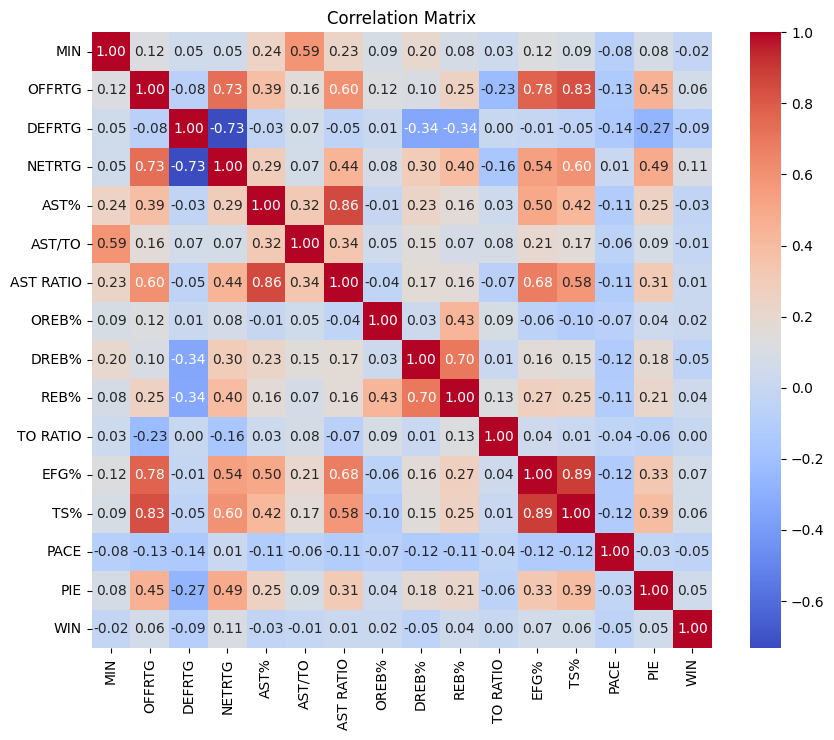

In [ ]:
import seaborn as sns
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numericals, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
yes = filtered_data[filtered_data["WIN"] == 1]
no = filtered_data[filtered_data["WIN"] == 0]

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# Split numerical and categorical variables
numerical_features = ['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE']
#categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

# Plot the distribution of numerical features
for feature in numerical_features:
    fig = px.histogram(filtered_data, x=feature, title=f"Distribution of {feature}", nbins=50)
    fig.show()

    # Plot the distribution of numerical features By Heart Disease
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=yes[feature], nbinsx=50, opacity=0.5, name='Yes', marker_color='red' ))
    fig.add_trace(go.Histogram(x=no[feature], nbinsx=50, opacity=0.5, name='No', marker_color='blue' ))
    fig.update_layout(title=f"Distribution of {feature} By Win",
                      xaxis_title=feature, yaxis_title="Count", barmode='group')
    fig.show()

In [ ]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define features and target
X = filtered_data.drop(columns=['WIN'])  # Features
y = filtered_data['WIN']  # Target

# Identify categorical and continuous features
categorical_features = ['LINEUPS']
continuous_features = ['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),  # Scaling continuous features
        ('cat', OneHotEncoder(drop='first'), categorical_features)  # One-hot encoding categorical features
    ])

# Apply transformations
X_transformed = preprocessor.fit_transform(X)

In [ ]:
# Convert sparse matrix to dense array
X_transformed_dense = X_transformed.toarray()  # Convert to dense format if sparse

# Combine all column names
continuous_columns = continuous_features
categorical_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_columns = list(continuous_columns) + list(categorical_columns)

# Create the DataFrame with the dense array
X_transformed_df = pd.DataFrame(X_transformed_dense, columns=all_columns, index=X.index)

# Display the transformed DataFrame
X_transformed_df.head()


MIN    OFFRTG    DEFRTG    NETRTG      AST%    AST/TO  AST RATIO  \
0  2.444162  0.167125  0.311053 -0.097830  0.236017  1.209257   0.160298   
1 -0.496550  0.726949  0.491716  0.161052 -0.143638 -0.045515  -0.033402   
2 -0.496550 -0.123848 -1.326851  0.819283  0.299736 -0.672902   0.232936   
3 -0.706601 -0.974645  1.514341 -1.696392 -1.471102 -0.672902  -1.381236   
4  1.183857  0.030997  0.106528 -0.051394 -0.263109  0.111331   0.063448   

      OREB%     DREB%      REB%  TO RATIO      EFG%       TS%      PACE  \
0 -0.051530  0.120851 -0.166576 -0.123118  0.147057  0.094868 -0.093375   
1  3.202512 -0.412205  0.495788  1.180356  0.391508  0.608926 -0.076407   
2  1.227972  0.438417  0.747938 -0.774856 -0.326756 -0.503249  0.012360   
3 -0.746568 -1.829908 -1.762270 -0.774856 -1.621441 -0.053853 -0.096187   
4 -0.252933 -0.128665 -0.298296  0.528619  0.204397  0.104568 -0.083469   

        PIE  LINEUPS_A. Davis - C. Wood - T. Prince - A. Reaves - M. Christie  \
0  0.006450                                                0.0                  
1  0.136894                                                0.0                  
2  0.504289                                                0.0                  
3 -0.521306                                                0.0                  
4  0.012434                                                0.0                  

   LINEUPS_A. Davis - C. Wood - T. Prince - R. Hachimura - A. Reaves  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   LINEUPS_A. Davis - D. Russell - C. Wood - T. Prince - A. Reaves  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                1.0                 
4                                                0.0                 

   LINEUPS_A. Davis - D. Russell - J. Vanderbilt - R. Hachimura - A. Reaves  \
0                                                0.0                          
1                                                0.0                          
2                                                0.0                          
3                                                0.0                          
4                                                0.0                          

   LINEUPS_A. Davis - D. Russell - J. Vanderbilt - R. Hachimura - M. Christie  \
0                                                0.0                            
1                                                0.0                            
2                                                0.0                            
3                                                0.0                            
4                                                0.0                            

   LINEUPS_A. Davis - D. Russell - R. Hachimura - A. Reaves - M. Christie  \
0                                                0.0                        
1                                                0.0                        
2                                                0.0                        
3                                                0.0                        
4                                                0.0                        

   LINEUPS_A. Davis - D. Russell - R. Hachimura - C. Reddish - A. Reaves  \
0                                                0.0                       
1                                                0.0                       
2                                                0.0                       
3                             

In [ ]:
X_transformed_df.columns

Index(['MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO', 'AST RATIO',
       'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%', 'PACE', 'PIE',
       'LINEUPS_A. Davis - C. Wood - T. Prince - A. Reaves - M. Christie',
       'LINEUPS_A. Davis - C. Wood - T. Prince - R. Hachimura - A. Reaves',
       'LINEUPS_A. Davis - D. Russell - C. Wood - T. Prince - A. Reaves',
       'LINEUPS_A. Davis - D. Russell - J. Vanderbilt - R. Hachimura - A. Reaves',
       'LINEUPS_A. Davis - D. Russell - J. Vanderbilt - R. Hachimura - M. Christie',
       'LINEUPS_A. Davis - D. Russell - R. Hachimura - A. Reaves - M. Christie',
       'LINEUPS_A. Davis - D. Russell - R. Hachimura - C. Reddish - A. Reaves',
       'LINEUPS_A. Davis - D. Russell - T. Prince - C. Reddish - A. Reaves',
       'LINEUPS_A. Davis - D. Russell - T. Prince - J. Vanderbilt - A. Reaves',
       'LINEUPS_A. Davis - D. Russell - T. Prince - R. Hachimura - A. Reaves',
       'LINEUPS_A. Davis - D. Russell - T. Prince - R. Hachi

In [ ]:
offensive_col = ['DEFRTG', 'DREB%', 'REB%', 'NETRTG','AST%', 'AST/TO', 'AST RATIO', 'TO RATIO'
]

defensive_col = ['OFFRTG', 'OREB%', 'EFG%', 'TS%', 'PACE', 'PIE','AST%', 'AST/TO', 'AST RATIO', 'TO RATIO'
]

playmake_col = ['OFFRTG', 'OREB%', 'EFG%', 'TS%', 'PACE', 'PIE','DEFRTG', 'DREB%', 'REB%', 'NETRTG'
]

off = X_transformed_df.copy(deep=True)
defe = X_transformed_df.copy(deep=True)
play = X_transformed_df.copy(deep=True)

In [51]:
defensive_X

MIN    DEFRTG    NETRTG     DREB%      REB%  \
0    2.444162  0.311053 -0.097830  0.120851 -0.166576   
1   -0.496550  0.491716  0.161052 -0.412205  0.495788   
2   -0.496550 -1.326851  0.819283  0.438417  0.747938   
3   -0.706601  1.514341 -1.696392 -1.829908 -1.762270   
4    1.183857  0.106528 -0.051394 -0.128665 -0.298296   
5   -0.496550  0.662154 -1.309812 -0.412205 -0.821413   
6   -0.706601 -0.190033  0.044961  1.005498  0.119445   
7    2.234111  0.343436 -0.493697  0.568845  0.002779   
8   -0.076448 -0.360471  0.393232  1.005498  1.421592   
9   -0.706601 -1.468314 -0.245264  1.005498  0.119445   
10  -0.706601 -1.894408  3.527668  1.005498  2.001160   
11   1.814009 -0.190033 -0.141944  0.259786  0.002779   
12  -0.076448  1.135970 -0.858221 -1.829908 -1.762270   
13  -0.286499  0.150842  0.277142  1.005498  0.119445   
14  -0.286499 -0.190033  0.741503  0.296646  0.386648   
15   2.234111  0.605910 -0.145427  0.690768 -0.223027   
16   0.133603  0.430359 -0.261517 -0.128665 -0.091307   
17  -0.286499 -0.677484  0.376979  0.438417  0.386648   
18  -0.496550  0.377523 -0.341619  1.005498  0.119445   
19  -0.706601 -1.894408  0.044961 -1.829908 -1.762270   
20   1.393907  0.377523  0.061214 -0.128665  0.119445   
21  -0.286499 -1.468314  1.496089  0.438417  0.747938   
22  -0.706601  0.946784 -1.890263 -1.829908 -1.762270   
23   1.393907  0.328096  0.145960  0.350519  0.119445   
24   0.553704 -0.190033  0.044961 -0.695746 -0.633241   
25   0.343653 -0.048570 -0.535490  0.296646 -0.350984   
26  -0.706601 -0.190033 -1.115941 -0.412205 -0.509048   
27  -0.706601 -0.190033  0.431542 -0.412205  0.119445   
28   1.603958  0.530917 -0.668994  0.231432 -0.509048   
29  -0.076448  0.541143 -0.162840  0.061308 -0.509048   
30   1.393907  0.023013  0.190074  0.489454  0.029123   
31   0.343653  0.203677 -0.044428 -0.128665 -0.633241   
32   0.133603 -0.190033  0.044961 -0.253422  0.010305   
33   0.133603  0.757599 -0.600500 -0.128665  0.288799   
34  -0.286499  0.377523 -0.148909 -0.695746 -0.350984   
35  -0.496550 -1.553533  0.393232 -1.121057 -0.350984   
36  -0.706601 -0.190033  0.819283 -0.412205  0.119445   
37  -0.706601  0.662154 -0.535490  1.005498  0.119445   
38  -0.706601  0.377523 -0.341619 -1.829908 -1.762270   
39  -0.706601 -0.190033  1.786315  1.005498  2.001160   
40  -0.706601 -1.042220 -0.535490  1.005498  0.119445   
41  -0.706601  2.366528 -2.857294 -1.829908 -1.762270   
42  -0.916652 -0.190033  0.625412 -1.829908 -1.762270   
43  -0.916652  1.514341 -2.276843 -1.829908 -1.762270   
44   3.284365  0.017900  0.065858  0.829703  0.175896   
45   0.553704 -0.403080  0.688101  0.061308 -0.192920   
46   0.133603  0.430359  0.044961  1.005498  1.462990   
47   0.133603 -0.500229  0.573172 -0.128665 -0.049909   
48  -0.496550 -1.042220  0.915638  0.061308  0.119445   
49  -0.706601 -0.190033  0.431542  1.005498  0.747938   
50  -0.916652  1.514341 -2.276843 -1.829908 -1.762270   
51   1.393907  0.120163  0.202844 -0.162689  0.262455   
52   0.343653  0.094597  0.721767  0.154876  0.826970   
53  -0.076448 -0.000848  0.032191 -0.128665  0.119445   
54  -0.286499 -0.190033  0.431542  1.005498  1.372667   
55  -0.286499  0.449107  0.190074 -0.613519 -0.509048   
56  -0.496550 -0.530908  1.438044  1.005498  1.248474   
57  -0.496550 -1.894408  1.592444 -0.412205  0.119445   
58  -0.916652 -1.894408  0.044961 -1.829908 -1.762270   
59   2.024060 -0.455916  0.414128  0.438417  0.409229   
60   1.393907  0.399680 -0.571478  0.747476  0.431810   
61   0.133603  0.094597  0.238832  1.005498  0.747938   
62  -0.286499  0.662154 -0.922070 -0.885718 -1.224100   
63  -0.286499  0.377523  0.238832  0.296646 -0.147759   
64  -0.496550  1.514341 -1.696392 -0.885718 -1.009584   
65  -0.496550 -1.042220  0.625412  1.005498 -0.509048   
66   2.234111  0.023013  0.044961  0.004600 -0.091307   
67   0.553704 -0.757590  0.504679 -0.253422 -0.113888   
68  -0.076448  0.150842 -0.187219 -0.128665 -0.392382   
69  -0.286499 -0.474

In [ ]:
offensive_X = off.drop(columns=offensive_col)
defensive_X = defe.drop(columns=defensive_col)
playmake_X = play.drop(columns=playmake_col)
offensive_X.head()

MIN    OFFRTG     OREB%      EFG%       TS%      PACE       PIE  \
0  2.444162  0.167125 -0.051530  0.147057  0.094868 -0.093375  0.006450   
1 -0.496550  0.726949  3.202512  0.391508  0.608926 -0.076407  0.136894   
2 -0.496550 -0.123848  1.227972 -0.326756 -0.503249  0.012360  0.504289   
3 -0.706601 -0.974645 -0.746568 -1.621441 -0.053853 -0.096187 -0.521306   
4  1.183857  0.030997 -0.252933  0.204397  0.104568 -0.083469  0.012434   

   LINEUPS_A. Davis - C. Wood - T. Prince - A. Reaves - M. Christie  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0                  
3                                                0.0                  
4                                                0.0                  

   LINEUPS_A. Davis - C. Wood - T. Prince - R. Hachimura - A. Reaves  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   LINEUPS_A. Davis - D. Russell - C. Wood - T. Prince - A. Reaves  \
0                                                0.0                 
1                                                0.0                 
2                                                0.0                 
3                                                1.0                 
4                                                0.0                 

   LINEUPS_A. Davis - D. Russell - J. Vanderbilt - R. Hachimura - A. Reaves  \
0                                                0.0                          
1                                                0.0                          
2                                                0.0                          
3                                                0.0                          
4                                                0.0                          

   LINEUPS_A. Davis - D. Russell - J. Vanderbilt - R. Hachimura - M. Christie  \
0                                                0.0                            
1                                                0.0                            
2                                                0.0                            
3                                                0.0                            
4                                                0.0                            

   LINEUPS_A. Davis - D. Russell - R. Hachimura - A. Reaves - M. Christie  \
0                                                0.0                        
1                                                0.0                        
2                                                0.0                        
3                                                0.0                        
4                                                0.0                        

   LINEUPS_A. Davis - D. Russell - R. Hachimura - C. Reddish - A. Reaves  \
0                                                0.0                       
1                                                0.0                       
2                                                0.0                       
3                                                0.0                       
4                                                0.0                       

   LINEUPS_A. Davis - D. Russell - T. Prince - C. Reddish - A. Reaves  \
0                                                0.0                    
1                                                0.0                    
2                                                0.0                    
3                                                0.0                    
4                            

In [ ]:
y.value_counts()

WIN
1    353
0    224
Name: count, dtype: int64

In [ ]:
filtered_data.columns

Index(['LINEUPS', 'MIN', 'OFFRTG', 'DEFRTG', 'NETRTG', 'AST%', 'AST/TO',
       'AST RATIO', 'OREB%', 'DREB%', 'REB%', 'TO RATIO', 'EFG%', 'TS%',
       'PACE', 'PIE', 'WIN'],
      dtype='object')

# All Stats

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [ ]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



         Current function value: 0.566993
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                  461
Model:                          Logit   Df Residuals:                      382
Method:                           MLE   Df Model:                           78
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.1512
Time:                        16:23:39   Log-Likelihood:                -261.38
converged:                      False   LL-Null:                       -307.94
Covariance Type:            nonrobust   LLR p-value:                    0.1167
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
const           

Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40, 50, 100, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


### XGBoost

In [ ]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1.0}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.63
Recall (Sensitivity): 0.70
F1 Score: 0.67
AUC-ROC: 0.50
Log Loss: 1.60
Normalized Confusion Matrix: [[0.35555556 0.64444444]
 [0.29577465 0.70422535]]


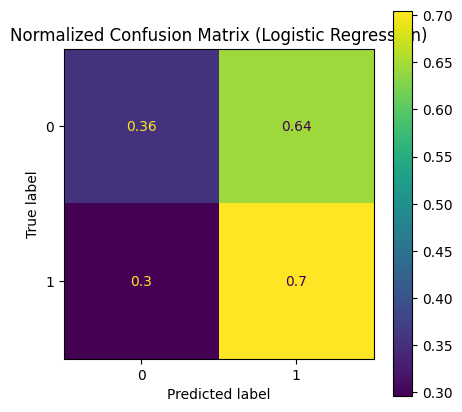

In [ ]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

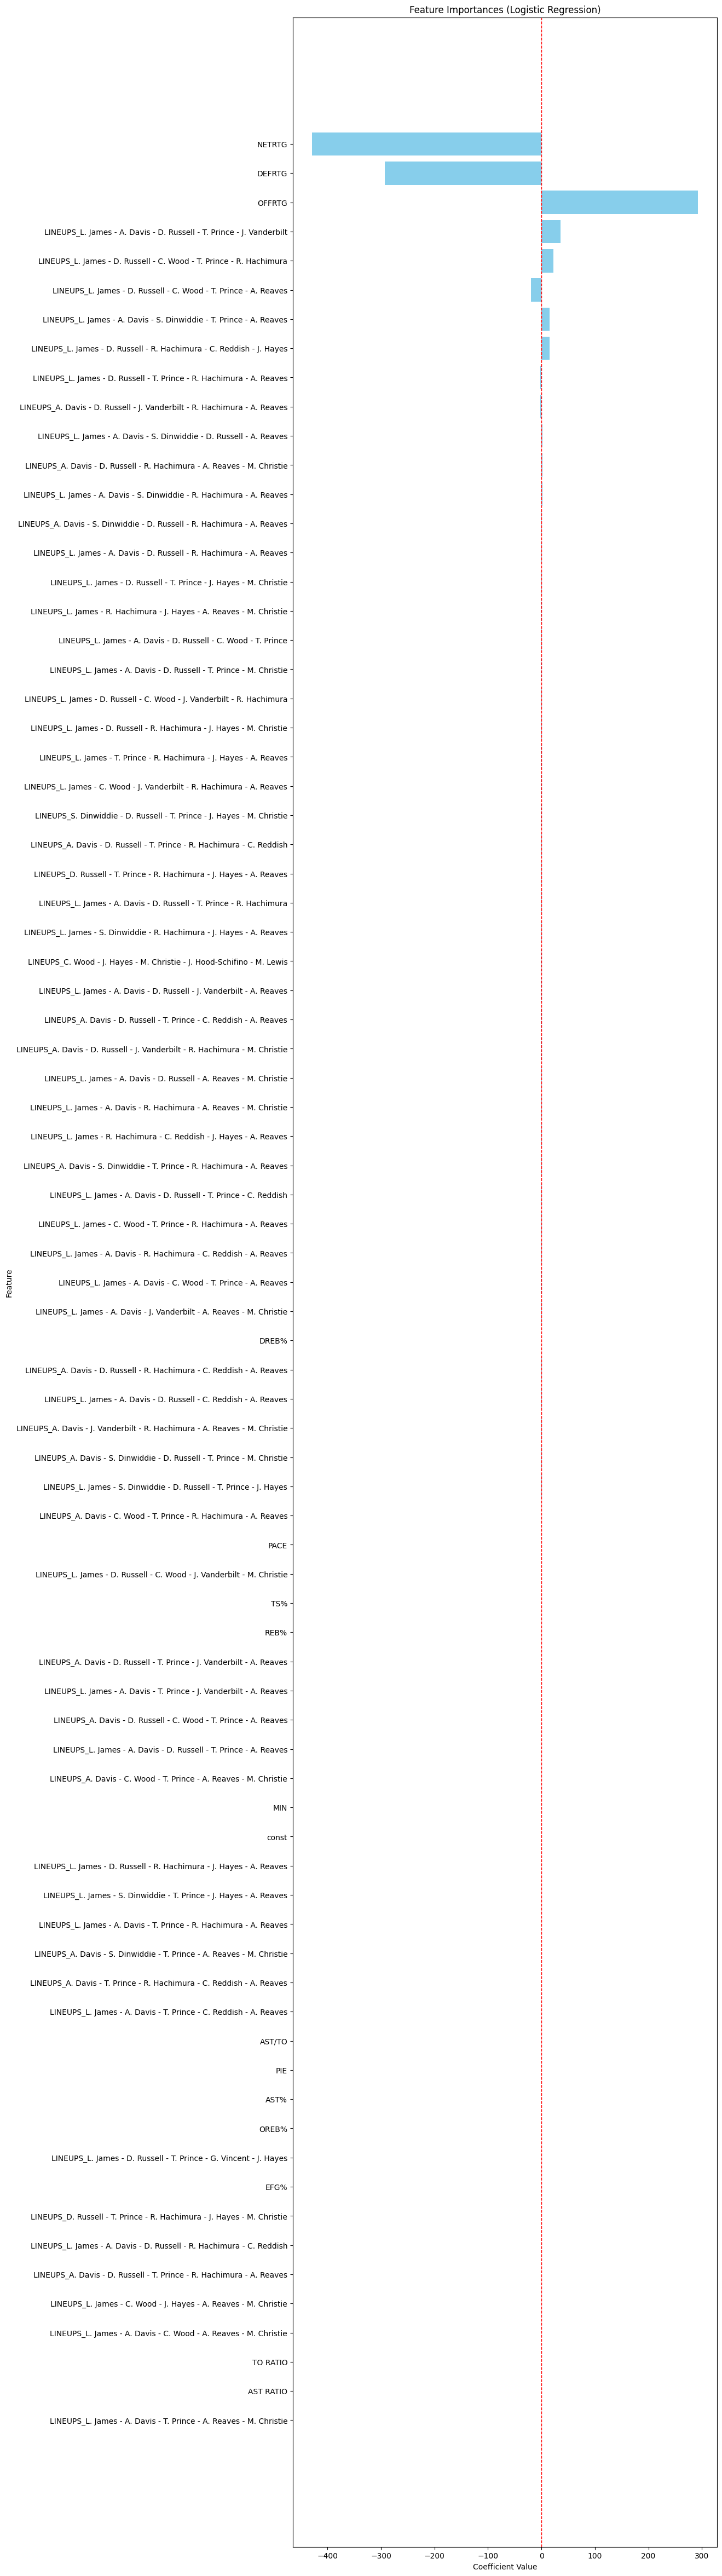

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get feature coefficients from the model
coefficients = logit_model.params  # Use `model.coef_` if using sklearn logistic regression

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    "Feature": coefficients.index,  # Feature names
    "Importance": coefficients.values  # Coefficients
}).sort_values(by="Importance", ascending=False, key=np.abs)  # Sort by absolute importance

# Plot feature importances
plt.figure(figsize=(10, 60))
plt.barh(feature_importances["Feature"], feature_importances["Importance"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importances (Logistic Regression)")
plt.axvline(0, color="red", linestyle="--", linewidth=1)  # Vertical line at 0 for reference
plt.gca().invert_yaxis()  # Most important feature on top
plt.show()


Confusion Matrix:
[[12 33]
 [17 54]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.27      0.32        45
           1       0.62      0.76      0.68        71

    accuracy                           0.57       116
   macro avg       0.52      0.51      0.50       116
weighted avg       0.54      0.57      0.54       116

F1 Score: 0.68
ROC AUC Score: 0.52
Precision: 0.62
Recall: 0.76


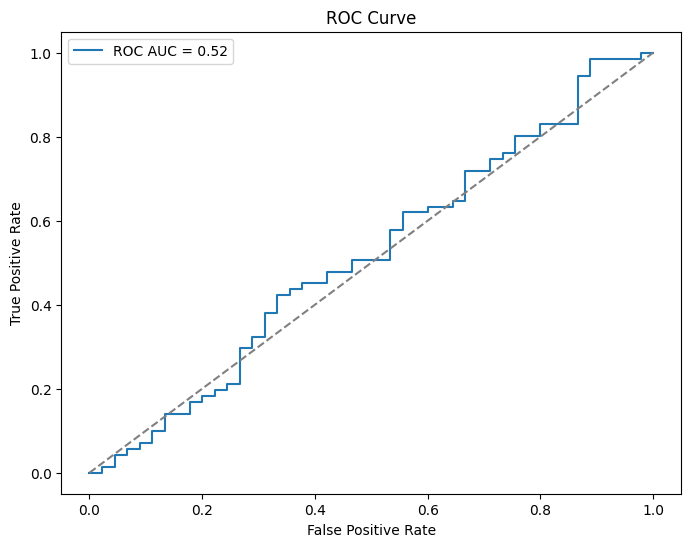

In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': X_transformed_df.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

Feature  Coefficient  Importance
0                                                  GP     1.192307    1.192307
37  Lineups_L. James - A. Davis - D. Russell - T. ...     0.833155    0.833155
23  Lineups_A. Davis - D. Russell - T. Prince - R....    -0.759532    0.759532
54  Lineups_S. Dinwiddie - D. Russell - T. Prince ...     0.745489    0.745489
47  Lineups_L. James - A. Davis - T. Prince - R. H...    -0.650199    0.650199
1                                                 MIN    -0.560809    0.560809
45  Lineups_L. James - A. Davis - T. Prince - J. V...    -0.555147    0.555147
28  Lineups_L. James - A. Davis - C. Wood - A. Rea...     0.536228    0.536228
6                                              AST/TO     0.535166    0.535166
34  Lineups_L. James - A. Davis - D. Russell - T. ...    -0.532307    0.532307
22  Lineups_A. Davis - D. Russell - T. Prince - J....    -0.521249    0.521249
20  Lineups_A. Davis - D. Russell - R. Hachimura -...    -0.521242    0.521242
10                                               REB%     0.501624    0.501624
9                                               DREB%    -0.468979    0.468979
14                                               PACE     0.453452    0.453452
18  Lineups_A. Davis - D. Russell - C. Wood - T. P...     0.439852    0.439852
53  Lineups_L. James - S. Dinwiddie - T. Prince - ...     0.432474    0.432474
30  Lineups_L. James - A. Davis - D. Russell - C. ...    -0.429563    0.429563
41  Lineups_L. James - A. Davis - S. Dinwiddie - D...     0.427673    0.427673
3                                              DefRtg    -0.407898    0.407898
51  Lineups_L. James - S. Dinwiddie - D. Russell -...     0.377709    0.377709
4                                              NetRtg     0.350359    0.350359
50  Lineups_L. James - R. Hachimura - C. Reddish -...     0.328570    0.328570
44  Lineups_L. James - A. Davis - T. Prince - C. R...     0.326442    0.326442
26  Lineups_A. Davis - S. Dinwiddie - D. Russell -...     0.304413    0.304413
25  Lineups_A. Davis - S. Dinwiddie - D. Russell -...    -0.281760    0.281760
24  Lineups_A. Davis - J. Vanderbilt - R. Hachimur...    -0.279726    0.279726
13                                                TS%     0.269835    0.269835
29  Lineups_L. James - A. Davis - C. Wood - T. Pri...    -0.246788    0.246788
46  Lineups_L. James - A. Davis - T. Prince - J. V...     0.223021    0.223021
39  Lineups_L. James - A. Davis - R. Hachimura - A...    -0.219565    0.219565
42  Lineups_L. James - A. Davis - S. Dinwiddie - R...    -0.216200    0.216200
21  Lineups_A. Davis - D. Russell - R. Hachimura -...     0.214414    0.214414
48  Lineups_L. James - D. Russell - R. Hachimura -...    -0.207160    0.207160
32  Lineups_L. James - A. Davis - D. Russell - R. ...     0.196970    0.196970
52  Lineups_L. James - S. Dinwiddie - R. Hachimura...    -0.193166    0.193166
16                                               HOME    -0.190454    0.190454
49  Lineups_L. James - D. Russell - T. Prince - J....     0.186344    0.186344
5                                                AST%    -0.183635    0.183635
11                                           TO Ratio     0.173222    0.173222
35  Lineups_L. James - A. Davis - D. Russell - T. ...     0.167092    0.167092
43  Lineups_L. James - A. Davis - T. Prince - A. R...    -0.161437    0.161437
8                                               OREB%     0.142668    0.142668
40  Lineups_L. James - A. Davis - R. Hachimura - C...    -0.141961    0.141961
33  Lineups_L. James - A. Davis - D. Russell - R. ...     0.131061    0.131061
15                                                PIE     0.119265    0.119265
38  Lineups_L. James - A. Davis - J. Vanderbilt - ...     0.102006    0.102006
17  Lineups_A. Davis - C. Wood - T. Prince - R. Ha...    -0.087925    0.087925
7                                           AST Ratio     0.080300    0.080300
2                                              OffRtg     0.066935    0.066935
19  Lineups_A. Da

### Decision Trees


Decision Tree Metrics:
Precision: 0.59
Recall (Sensitivity): 0.62
F1 Score: 0.60
AUC-ROC: 0.46
Log Loss: 2.58
Normalized Confusion Matrix: [[0.31111111 0.68888889]
 [0.38028169 0.61971831]]


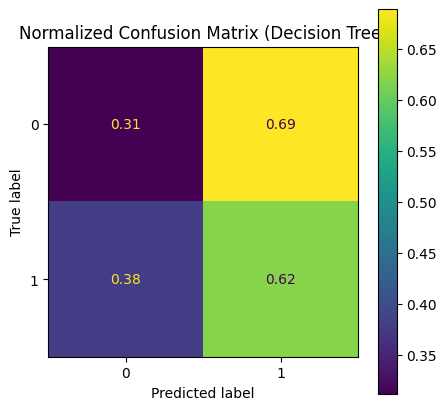

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Random Forest Metrics:
Precision: 0.62
Recall (Sensitivity): 0.59
F1 Score: 0.60
AUC-ROC: 0.50
Log Loss: 0.70
Normalized Confusion Matrix: [[0.42222222 0.57777778]
 [0.4084507  0.5915493 ]]


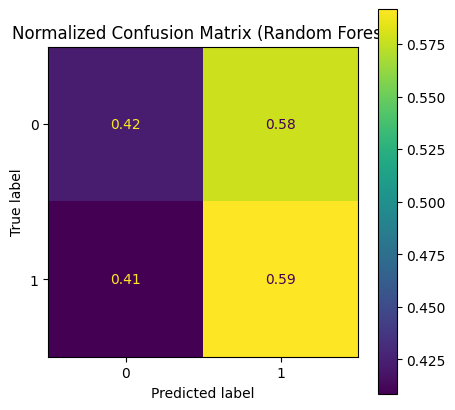

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30, 'subsample': 1.0}


XGBoost Metrics:
Precision: 0.61
Recall (Sensitivity): 0.83
F1 Score: 0.70
AUC-ROC: 0.48
Log Loss: 0.71
Normalized Confusion Matrix: [[0.15555556 0.84444444]
 [0.16901408 0.83098592]]


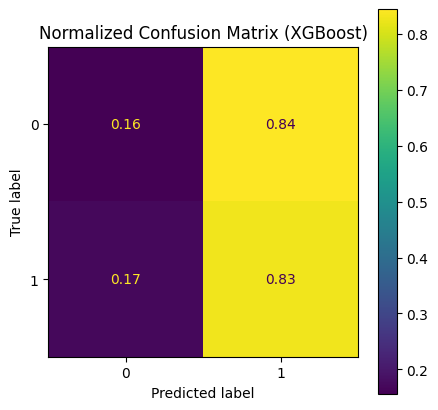

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=1.0,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=5,
    n_estimators=30,
    subsample=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Offensive Stats Only

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(offensive_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [68]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [69]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



         Current function value: 0.592000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                  461
Model:                          Logit   Df Residuals:                      390
Method:                           MLE   Df Model:                           70
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1137
Time:                        22:57:03   Log-Likelihood:                -272.91
converged:                      False   LL-Null:                       -307.94
Covariance Type:            nonrobust   LLR p-value:                    0.4759
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
const           

Decision Trees

In [ ]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


### XGBoost

In [ ]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40,100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 40, 'subsample': 0.8}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.61
Recall (Sensitivity): 0.72
F1 Score: 0.66
AUC-ROC: 0.46
Log Loss: 1.97
Normalized Confusion Matrix: [[0.28888889 0.71111111]
 [0.28169014 0.71830986]]


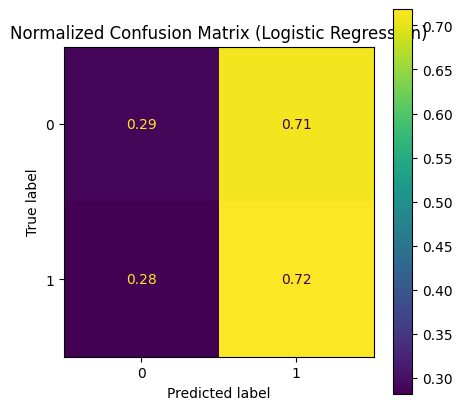

In [ ]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[ 7 38]
 [10 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.16      0.23        45
           1       0.62      0.86      0.72        71

    accuracy                           0.59       116
   macro avg       0.51      0.51      0.47       116
weighted avg       0.54      0.59      0.53       116

F1 Score: 0.66
ROC AUC Score: 0.47
Precision: 0.61
Recall: 0.72


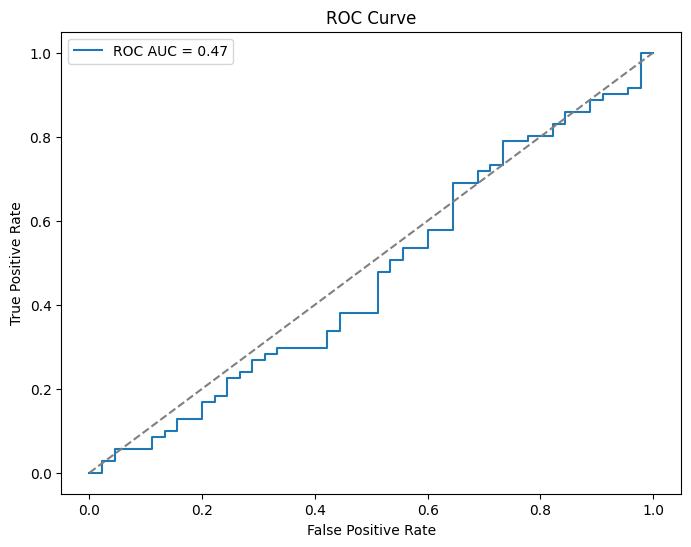

In [ ]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': offensive_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

Feature  Coefficient  Importance
62  LINEUPS_L. James - D. Russell - T. Prince - R....    -1.303448    1.303448
37  LINEUPS_L. James - A. Davis - D. Russell - T. ...     1.031363    1.031363
57  LINEUPS_L. James - D. Russell - R. Hachimura -...     0.996170    0.996170
55  LINEUPS_L. James - D. Russell - C. Wood - T. P...    -0.952468    0.952468
33  LINEUPS_L. James - A. Davis - D. Russell - R. ...     0.898070    0.898070
10  LINEUPS_A. Davis - D. Russell - J. Vanderbilt ...    -0.796159    0.796159
38  LINEUPS_L. James - A. Davis - D. Russell - T. ...    -0.723187    0.723187
28  LINEUPS_L. James - A. Davis - C. Wood - T. Pri...    -0.694389    0.694389
44  LINEUPS_L. James - A. Davis - S. Dinwiddie - R...     0.690075    0.690075
56  LINEUPS_L. James - D. Russell - C. Wood - T. P...     0.660893    0.660893
45  LINEUPS_L. James - A. Davis - S. Dinwiddie - T...     0.659080    0.659080
19  LINEUPS_A. Davis - S. Dinwiddie - D. Russell -...     0.604558    0.604558
11  LINEUPS_A. Davis - D. Russell - J. Vanderbilt ...    -0.588562    0.588562
43  LINEUPS_L. James - A. Davis - S. Dinwiddie - D...     0.582701    0.582701
51  LINEUPS_L. James - C. Wood - J. Vanderbilt - R...    -0.567264    0.567264
48  LINEUPS_L. James - A. Davis - T. Prince - J. V...    -0.522685    0.522685
17  LINEUPS_A. Davis - D. Russell - T. Prince - R....     0.516768    0.516768
14  LINEUPS_A. Davis - D. Russell - T. Prince - C....    -0.495388    0.495388
69  LINEUPS_S. Dinwiddie - D. Russell - T. Prince ...    -0.487497    0.487497
66  LINEUPS_L. James - S. Dinwiddie - R. Hachimura...     0.476603    0.476603
15  LINEUPS_A. Davis - D. Russell - T. Prince - J....    -0.466837    0.466837
32  LINEUPS_L. James - A. Davis - D. Russell - J. ...    -0.464128    0.464128
24  LINEUPS_C. Wood - J. Hayes - M. Christie - J. ...    -0.462535    0.462535
31  LINEUPS_L. James - A. Davis - D. Russell - C. ...     0.447973    0.447973
49  LINEUPS_L. James - A. Davis - T. Prince - R. H...    -0.416991    0.416991
12  LINEUPS_A. Davis - D. Russell - R. Hachimura -...     0.404890    0.404890
41  LINEUPS_L. James - A. Davis - R. Hachimura - A...     0.384676    0.384676
36  LINEUPS_L. James - A. Davis - D. Russell - T. ...     0.360023    0.360023
54  LINEUPS_L. James - D. Russell - C. Wood - J. V...     0.333890    0.333890
39  LINEUPS_L. James - A. Davis - D. Russell - T. ...     0.332664    0.332664
47  LINEUPS_L. James - A. Davis - T. Prince - C. R...    -0.318060    0.318060
68  LINEUPS_L. James - T. Prince - R. Hachimura - ...    -0.301045    0.301045
26  LINEUPS_D. Russell - T. Prince - R. Hachimura ...    -0.291412    0.291412
8   LINEUPS_A. Davis - C. Wood - T. Prince - R. Ha...    -0.277129    0.277129
64  LINEUPS_L. James - R. Hachimura - J. Hayes - A...    -0.275420    0.275420
63  LINEUPS_L. James - R. Hachimura - C. Reddish -...     0.245905    0.245905
53  LINEUPS_L. James - D. Russell - C. Wood - J. V...    -0.245169    0.245169
59  LINEUPS_L. James - D. Russell - R. Hachimura -...     0.238647    0.238647
0                                                 MIN    -0.232338    0.232338
22  LINEUPS_A. Davis - S. Dinwiddie - T. Prince - ...     0.217102    0.217102
27  LINEUPS_L. James - A. Davis - C. Wood - A. Rea...    -0.215548    0.215548
18  LINEUPS_A. Davis - J. Vanderbilt - R. Hachimur...     0.212598    0.212598
61  LINEUPS_L. James - D. Russell - T. Prince - J....     0.211524    0.211524
5                                                PACE     0.200958    0.200958
40  LINEUPS_L. James - A. Davis - J. Vanderbilt - ...     0.196922    0.196922
50  LINEUPS_L. James - C. Wood - J. Hayes - A. Rea...    -0.183098    0.183098
52  LINEUPS_L. James - C. Wood - T. Prince - R. Ha...     0.172621    0.172621
30  LINEUPS_L. James - A. Davis - D. Russell - C. ...     0.171894    0.171894
25  LINEUPS_D. Russell - T. Prince - R. Hachimura ...     0.163449    0.163449
4                                                 TS%     0.163403    0.163403
42  LINEUPS_L. Ja

### Decision Trees


Decision Tree Metrics:
Precision: 0.61
Recall (Sensitivity): 0.93
F1 Score: 0.73
AUC-ROC: 0.50
Log Loss: 1.02
Normalized Confusion Matrix: [[0.04444444 0.95555556]
 [0.07042254 0.92957746]]


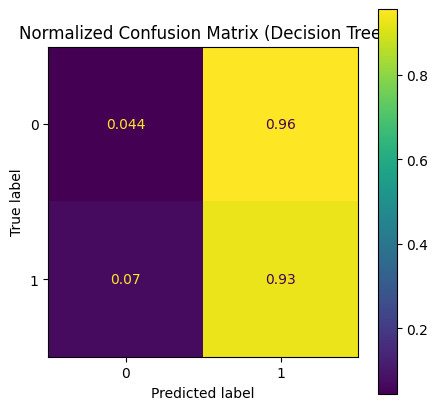

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=1,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest


Random Forest Metrics:
Precision: 0.60
Recall (Sensitivity): 0.79
F1 Score: 0.68
AUC-ROC: 0.49
Log Loss: 0.72
Normalized Confusion Matrix: [[0.15555556 0.84444444]
 [0.21126761 0.78873239]]


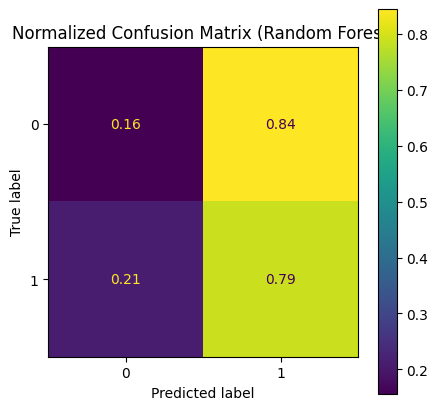

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=30,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost


XGBoost Metrics:
Precision: 0.61
Recall (Sensitivity): 1.00
F1 Score: 0.76
AUC-ROC: 0.52
Log Loss: 0.67
Normalized Confusion Matrix: [[0. 1.]
 [0. 1.]]


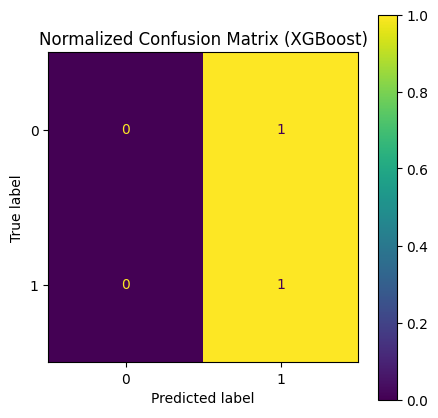

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=40,
    subsample=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Defensive Stats

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(defensive_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [63]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [64]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



         Current function value: 0.573438
         Iterations: 35


LinAlgError: Singular matrix

Decision Trees

In [55]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 10}


### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}


### XGBoost

In [58]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40,100],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 20, 'subsample': 1.0}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.63
Recall (Sensitivity): 0.70
F1 Score: 0.67
AUC-ROC: 0.50
Log Loss: 1.60
Normalized Confusion Matrix: [[0.35555556 0.64444444]
 [0.29577465 0.70422535]]


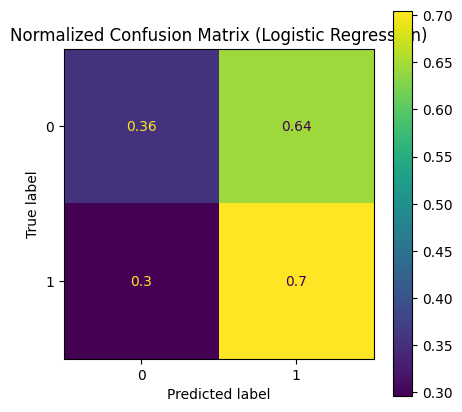

In [59]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[11 34]
 [11 60]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.24      0.33        45
           1       0.64      0.85      0.73        71

    accuracy                           0.61       116
   macro avg       0.57      0.54      0.53       116
weighted avg       0.58      0.61      0.57       116

F1 Score: 0.67
ROC AUC Score: 0.50
Precision: 0.63
Recall: 0.70


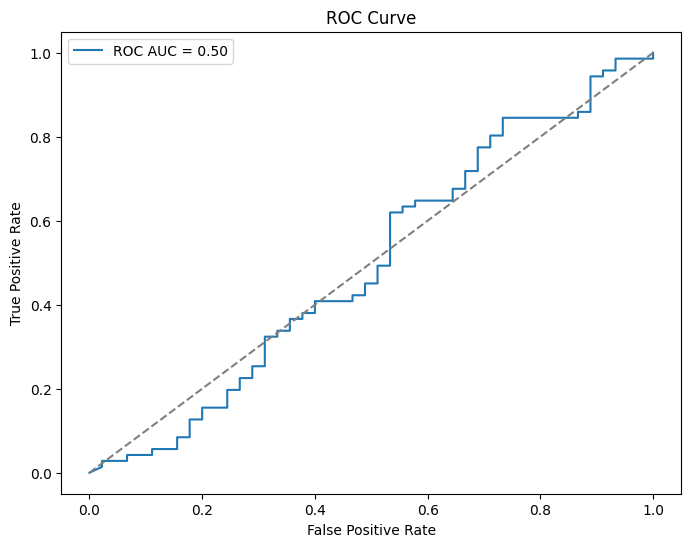

In [60]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [61]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': defe.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

ValueError: All arrays must be of the same length

### Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=40,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost

In [ ]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=100,
    subsample=1.0,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# Playmaking Stats

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, precision_score,
    recall_score, f1_score, roc_curve
)
import matplotlib.pyplot as plt

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(playmake_X, y, test_size=0.2, random_state=42, stratify=y)

## Supervised Modeling

### Logistec Regression

In [72]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)


In [73]:
# Add constant for intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Train logistic regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_sm).fit()

# Print model summary
print(logit_model.summary())

# Make predictions on test data
y_pred_sm = logit_model.predict(X_test_sm)
y_pred_class = (y_pred_sm > 0.5).astype(int)  # Convert probabilities to binary outcomes



         Current function value: 0.595021
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                    WIN   No. Observations:                  461
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                           68
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1092
Time:                        22:58:18   Log-Likelihood:                -274.30
converged:                      False   LL-Null:                       -307.94
Covariance Type:            nonrobust   LLR p-value:                    0.5024
                                                                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------
const           

### Decision Trees

In [74]:
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_fscore_support,
    roc_auc_score,
    log_loss,
)

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Define the decision tree classifier and the hyperparameter grid
decision_tree = DecisionTreeClassifier(random_state=42)
param_grid = {
    "max_depth": [3,4,5,6,7,8,9,10, None],
    "min_samples_split": [2,3,4,5, 10],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search.fit(X_train, y_train)

# Extract the best model
best_tree = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


### Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the Random Forest classifier and hyperparameter grid
rf_classifier = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators": [20,30, 40, 50, 100, 200],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 3, 4, 5, 10],
    "min_samples_leaf": [1, 2, 4, 6],
    "criterion": ["gini", "entropy"],
}

# Perform GridSearchCV
grid_search_rf_model = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid_rf,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_rf_model.fit(X_train, y_train)

# Extract the best model and parameters
best_rf_model = grid_search_rf_model.best_estimator_
best_rf_params = grid_search_rf_model.best_params_
print(f"Best Parameters: {best_rf_params}")


Fitting 5 folds for each of 1200 candidates, totalling 6000 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### XGBoost

In [77]:
import xgboost as xgb

# Define the XGBoost classifier and hyperparameter grid
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
param_grid_xgb = {
    "n_estimators": [20,30,40],
    "max_depth": [3, 5],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0]
}

# Perform GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid_xgb,
    scoring="roc_auc",
    cv=5,
    verbose=1,
)
grid_search_xgb.fit(X_train, y_train)

# Extract the best model and parameters
best_xgb = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_
print(f"Best Parameters: {best_xgb_params}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20, 'subsample': 1.0}


## Model Evaluation

### Logistic Regression


Metrics:
Precision: 0.62
Recall (Sensitivity): 0.70
F1 Score: 0.66
AUC-ROC: 0.49
Log Loss: 1.58
Normalized Confusion Matrix: [[0.31111111 0.68888889]
 [0.29577465 0.70422535]]


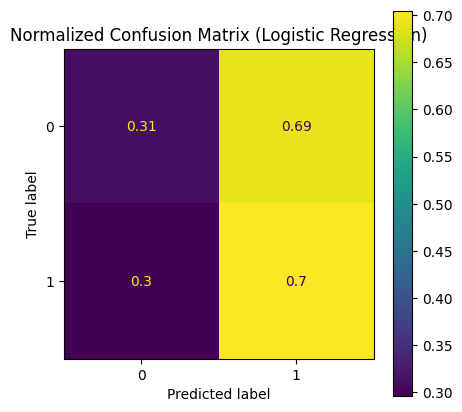

In [84]:

# Evaluate the model
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_class, average="binary")
auc_roc = roc_auc_score(y_test, y_pred_sm)
logloss = log_loss(y_test, y_pred_sm)
cm = confusion_matrix(y_test, y_pred_class, normalize="true")

# Print evaluation metrics
print("\nMetrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Log Loss: {logloss:.2f}")
print(f"Normalized Confusion Matrix: {cm}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cmd.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Logistic Regression)")
plt.show()

Confusion Matrix:
[[ 9 36]
 [13 58]]

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.20      0.27        45
           1       0.62      0.82      0.70        71

    accuracy                           0.58       116
   macro avg       0.51      0.51      0.49       116
weighted avg       0.54      0.58      0.53       116

F1 Score: 0.66
ROC AUC Score: 0.49
Precision: 0.62
Recall: 0.70


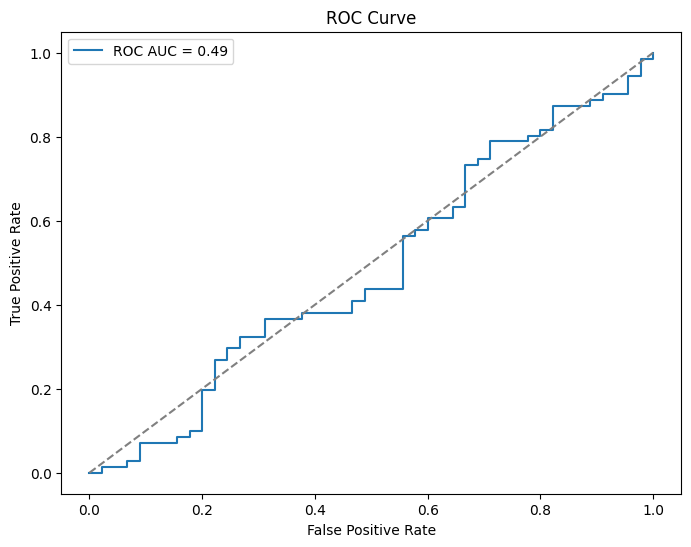

In [79]:
# Print evaluation metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [80]:
# Extract feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': playmake_X.columns,
    'Coefficient': model.coef_[0],
    'Importance': abs(model.coef_[0])
})

# Sort features by importance
coefficients = coefficients.sort_values(by='Importance', ascending=False)

coefficients

Feature  Coefficient  Importance
60  LINEUPS_L. James - D. Russell - T. Prince - R....    -1.275437    1.275437
53  LINEUPS_L. James - D. Russell - C. Wood - T. P...    -1.008040    1.008040
35  LINEUPS_L. James - A. Davis - D. Russell - T. ...     0.971233    0.971233
55  LINEUPS_L. James - D. Russell - R. Hachimura -...     0.937436    0.937436
31  LINEUPS_L. James - A. Davis - D. Russell - R. ...     0.873758    0.873758
36  LINEUPS_L. James - A. Davis - D. Russell - T. ...    -0.774923    0.774923
8   LINEUPS_A. Davis - D. Russell - J. Vanderbilt ...    -0.774683    0.774683
42  LINEUPS_L. James - A. Davis - S. Dinwiddie - R...     0.759617    0.759617
26  LINEUPS_L. James - A. Davis - C. Wood - T. Pri...    -0.697502    0.697502
43  LINEUPS_L. James - A. Davis - S. Dinwiddie - T...     0.689290    0.689290
54  LINEUPS_L. James - D. Russell - C. Wood - T. P...     0.685440    0.685440
17  LINEUPS_A. Davis - S. Dinwiddie - D. Russell -...     0.606763    0.606763
46  LINEUPS_L. James - A. Davis - T. Prince - J. V...    -0.575331    0.575331
41  LINEUPS_L. James - A. Davis - S. Dinwiddie - D...     0.551653    0.551653
9   LINEUPS_A. Davis - D. Russell - J. Vanderbilt ...    -0.528512    0.528512
15  LINEUPS_A. Davis - D. Russell - T. Prince - R....     0.523501    0.523501
12  LINEUPS_A. Davis - D. Russell - T. Prince - C....    -0.516232    0.516232
67  LINEUPS_S. Dinwiddie - D. Russell - T. Prince ...    -0.507992    0.507992
49  LINEUPS_L. James - C. Wood - J. Vanderbilt - R...    -0.502072    0.502072
22  LINEUPS_C. Wood - J. Hayes - M. Christie - J. ...    -0.493641    0.493641
30  LINEUPS_L. James - A. Davis - D. Russell - J. ...    -0.465966    0.465966
64  LINEUPS_L. James - S. Dinwiddie - R. Hachimura...     0.462439    0.462439
13  LINEUPS_A. Davis - D. Russell - T. Prince - J....    -0.443773    0.443773
10  LINEUPS_A. Davis - D. Russell - R. Hachimura -...     0.404147    0.404147
39  LINEUPS_L. James - A. Davis - R. Hachimura - A...     0.396778    0.396778
62  LINEUPS_L. James - R. Hachimura - J. Hayes - A...    -0.388975    0.388975
29  LINEUPS_L. James - A. Davis - D. Russell - C. ...     0.362129    0.362129
34  LINEUPS_L. James - A. Davis - D. Russell - T. ...     0.359932    0.359932
47  LINEUPS_L. James - A. Davis - T. Prince - R. H...    -0.356375    0.356375
52  LINEUPS_L. James - D. Russell - C. Wood - J. V...     0.310224    0.310224
45  LINEUPS_L. James - A. Davis - T. Prince - C. R...    -0.304940    0.304940
57  LINEUPS_L. James - D. Russell - R. Hachimura -...     0.284559    0.284559
66  LINEUPS_L. James - T. Prince - R. Hachimura - ...    -0.268000    0.268000
6   LINEUPS_A. Davis - C. Wood - T. Prince - R. Ha...    -0.267578    0.267578
61  LINEUPS_L. James - R. Hachimura - C. Reddish -...     0.260138    0.260138
16  LINEUPS_A. Davis - J. Vanderbilt - R. Hachimur...     0.259649    0.259649
25  LINEUPS_L. James - A. Davis - C. Wood - A. Rea...    -0.258681    0.258681
37  LINEUPS_L. James - A. Davis - D. Russell - T. ...     0.243034    0.243034
24  LINEUPS_D. Russell - T. Prince - R. Hachimura ...    -0.231674    0.231674
0                                                 MIN    -0.226261    0.226261
59  LINEUPS_L. James - D. Russell - T. Prince - J....     0.223145    0.223145
48  LINEUPS_L. James - C. Wood - J. Hayes - A. Rea...    -0.210507    0.210507
51  LINEUPS_L. James - D. Russell - C. Wood - J. V...    -0.195857    0.195857
3                                           AST RATIO     0.185421    0.185421
33  LINEUPS_L. James - A. Davis - D. Russell - T. ...     0.168764    0.168764
1                                                AST%    -0.166610    0.166610
32  LINEUPS_L. James - A. Davis - D. Russell - R. ...     0.161346    0.161346
38  LINEUPS_L. James - A. Davis - J. Vanderbilt - ...     0.149871    0.149871
40  LINEUPS_L. James - A. Davis - R. Hachimura - C...     0.148222    0.148222
58  LINEUPS_L. James - D. Russell - T. Prince - G....    -0.144209    0.144209
23  LINEUPS_D. Ru

### Decision Trees

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}


Decision Tree Metrics:
Precision: 0.69
Recall (Sensitivity): 0.58
F1 Score: 0.63
AUC-ROC: 0.60
Log Loss: 1.24
Normalized Confusion Matrix: [[0.6        0.4       ]
 [0.42253521 0.57746479]]


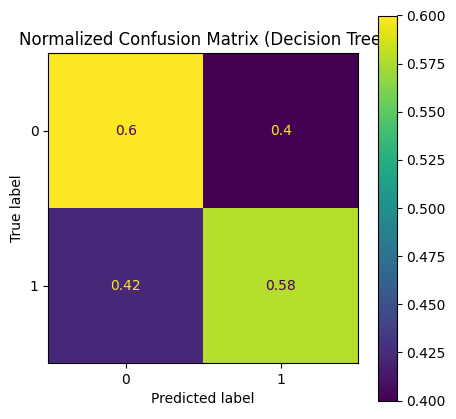

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define and train the Decision Tree with the specified hyperparameters
best_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=7,
    min_samples_leaf=2,
    min_samples_split=2,
    random_state=42
)
best_tree.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Compute metrics
precision_tree, recall_tree, f1_tree, _ = precision_recall_fscore_support(
    y_test, y_pred_tree, average="binary"
)
auc_roc_tree = roc_auc_score(y_test, y_proba_tree)
logloss_tree = log_loss(y_test, y_proba_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, normalize="true")

# Print evaluation metrics
print("\nDecision Tree Metrics:")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall (Sensitivity): {recall_tree:.2f}")
print(f"F1 Score: {f1_tree:.2f}")
print(f"AUC-ROC: {auc_roc_tree:.2f}")
print(f"Log Loss: {logloss_tree:.2f}")
print(f"Normalized Confusion Matrix: {cm_tree}")

# Display the normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[0, 1])
cmd_tree.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Decision Tree)")
plt.show()


### Random Forest

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Random Forest Metrics:
Precision: 0.58
Recall (Sensitivity): 0.63
F1 Score: 0.60
AUC-ROC: 0.44
Log Loss: 0.80
Normalized Confusion Matrix: [[0.26666667 0.73333333]
 [0.36619718 0.63380282]]


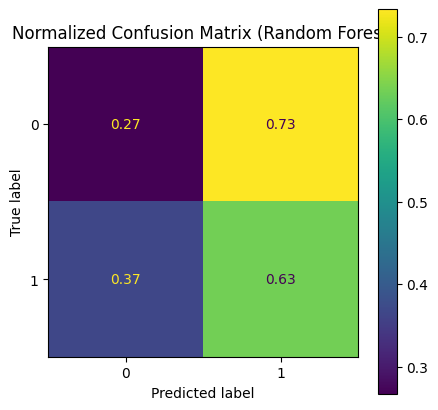

In [82]:
from sklearn.ensemble import RandomForestClassifier

# Define and train the Random Forest model with specified parameters
best_rf_model = RandomForestClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

# Evaluate the best Random Forest model on the test set
y_pred_rf_model = best_rf_model.predict(X_test)
y_proba_rf_model = best_rf_model.predict_proba(X_test)[:, 1]

# Compute metrics
precision_rf_model, recall_rf_model, f1_rf_model, _ = precision_recall_fscore_support(
    y_test, y_pred_rf_model, average="binary"
)
auc_roc_rf_model = roc_auc_score(y_test, y_proba_rf_model)
logloss_rf_model = log_loss(y_test, y_proba_rf_model)
cm_rf_model = confusion_matrix(y_test, y_pred_rf_model, normalize="true")

# Print evaluation metrics
print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf_model:.2f}")
print(f"Recall (Sensitivity): {recall_rf_model:.2f}")
print(f"F1 Score: {f1_rf_model:.2f}")
print(f"AUC-ROC: {auc_roc_rf_model:.2f}")
print(f"Log Loss: {logloss_rf_model:.2f}")
print(f"Normalized Confusion Matrix: {cm_rf_model}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_rf_model = ConfusionMatrixDisplay(confusion_matrix=cm_rf_model, display_labels=[0, 1])
cmd_rf_model.plot(ax=ax)
plt.title("Normalized Confusion Matrix (Random Forest)")
plt.show()


### XGBoost

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 20, 'subsample': 1.0}


XGBoost Metrics:
Precision: 0.61
Recall (Sensitivity): 0.94
F1 Score: 0.74
AUC-ROC: 0.51
Log Loss: 0.68
Normalized Confusion Matrix: [[0.06666667 0.93333333]
 [0.05633803 0.94366197]]


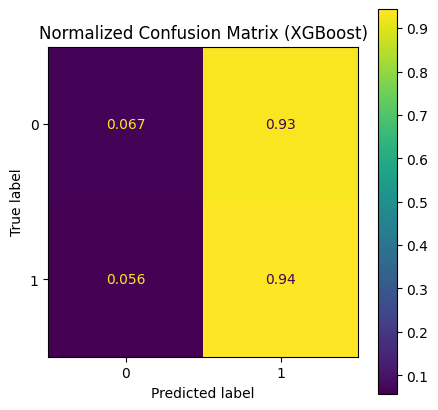

In [83]:
from xgboost import XGBClassifier

# Define and train the XGBoost model with specified parameters
best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.05,
    max_depth=5,
    n_estimators=20,
    subsample=1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
best_xgb.fit(X_train, y_train)

# Evaluate the best XGBoost model on the test set
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute metrics
precision_xgb, recall_xgb, f1_xgb, _ = precision_recall_fscore_support(
    y_test, y_pred_xgb, average="binary"
)
auc_roc_xgb = roc_auc_score(y_test, y_proba_xgb)
logloss_xgb = log_loss(y_test, y_proba_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb, normalize="true")

# Print evaluation metrics
print("\nXGBoost Metrics:")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall (Sensitivity): {recall_xgb:.2f}")
print(f"F1 Score: {f1_xgb:.2f}")
print(f"AUC-ROC: {auc_roc_xgb:.2f}")
print(f"Log Loss: {logloss_xgb:.2f}")
print(f"Normalized Confusion Matrix: {cm_xgb}")

# Display normalized confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
cmd_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=[0, 1])
cmd_xgb.plot(ax=ax)
plt.title("Normalized Confusion Matrix (XGBoost)")
plt.show()


# EXTRA

In [ ]:
# Updated model comparison DataFrame with all metrics rounded to 3 decimals
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "LightGBM",
        "XGBoost",
        "Neural Network"
    ],
    "Precision": [
        round(precision, 3),
        round(precision_tree, 3),
        round(precision_rf_model, 3),
        round(precision_xgb, 3)
    ],
    "Recall": [
        round(recall, 3),
        round(recall_tree, 3),
        round(recall_rf_model, 3),
        round(recall_xgb, 3)
    ],
    "F1 Score": [
        round(f1, 3),
        round(f1_tree, 3),
        round(f1_rf_model, 3)
        round(f1_xgb, 3)
    ],
    "AUC-ROC": [
        round(auc_roc, 3),
        round(auc_roc_tree, 3),
        round(auc_roc_rf_model, 3)
        round(auc_roc_xgb, 3)
    ],
    "Log Loss": [
        round(logloss, 3),
        round(logloss_tree, 3),
        round(logloss_rf_model, 3)
        round(logloss_xgb, 3)
    ]
})

# Display the updated DataFrame
print(model_comparison)


In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt


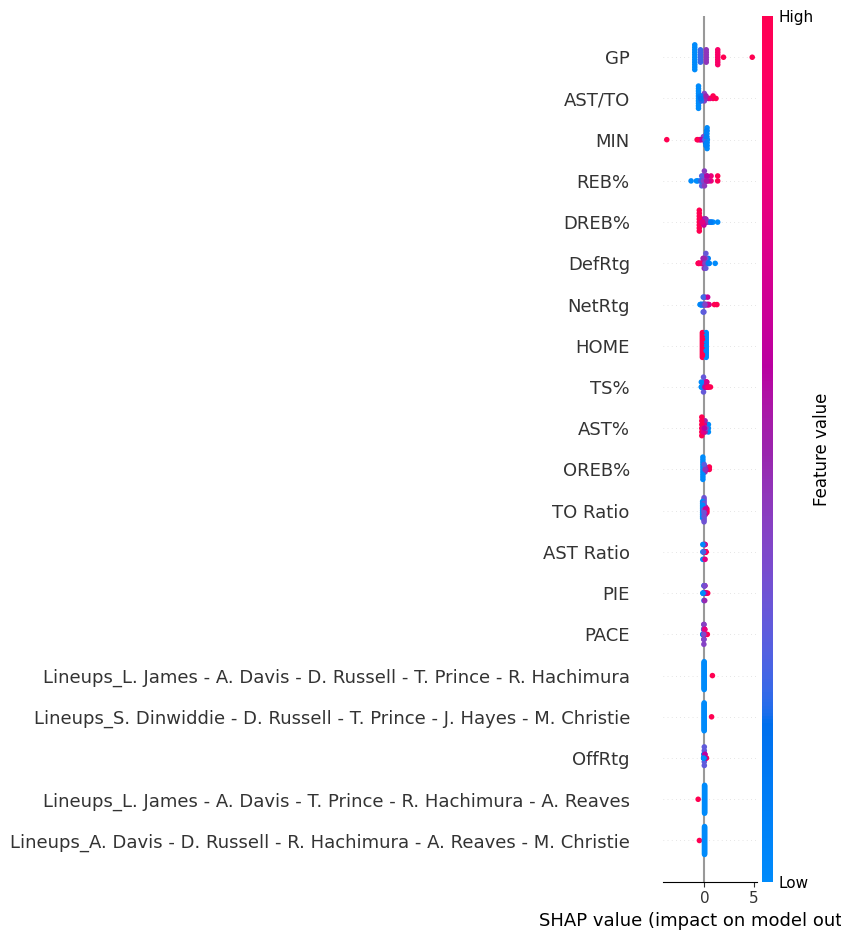

IndexError: invalid index to scalar variable.

In [ ]:
# Initialize the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualizations
# 1. Summary Plot
shap.summary_plot(shap_values, X_test)

# 2. Force Plot for the first prediction
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[0])

# 3. Bar Plot for feature importance
shap.plots.bar(shap_values)

# 4. Dependence Plot for a specific feature
shap.dependence_plot('GP', shap_values.values, X_test)



Lasso (L1) Metrics:
Precision: 0.61
Recall (Sensitivity): 0.82
F1 Score: 0.70
AUC-ROC: 0.52
Log Loss: 0.69
Normalized Confusion Matrix: 
[[0.17777778 0.82222222]
 [0.18309859 0.81690141]]


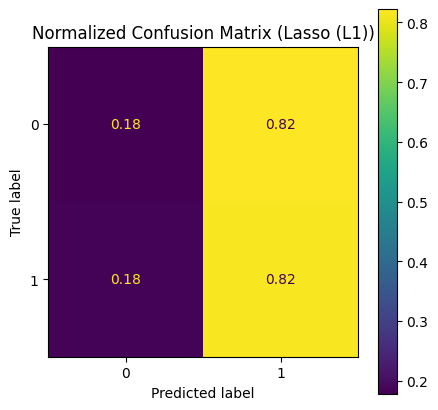


Ridge (L2) Metrics:
Precision: 0.62
Recall (Sensitivity): 0.76
F1 Score: 0.68
AUC-ROC: 0.52
Log Loss: 0.71
Normalized Confusion Matrix: 
[[0.26666667 0.73333333]
 [0.23943662 0.76056338]]


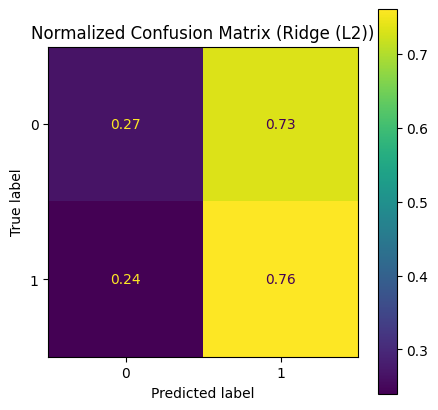

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    log_loss,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Logistic Regression with L1 Regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_prob_lasso = lasso_model.predict_proba(X_test)[:, 1]

# Logistic Regression with L2 Regularization (Ridge)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_prob_ridge = ridge_model.predict_proba(X_test)[:, 1]

# Evaluate L1 and L2 models
def evaluate_model(y_test, y_pred, y_pred_prob, model_name):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    logloss = log_loss(y_test, y_pred_prob)
    cm = confusion_matrix(y_test, y_pred, normalize="true")

    print(f"\n{model_name} Metrics:")
    print(f"Precision: {precision:.2f}")
    print(f"Recall (Sensitivity): {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print(f"Log Loss: {logloss:.2f}")
    print(f"Normalized Confusion Matrix: \n{cm}")

    # Display normalized confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cmd.plot(ax=ax)
    plt.title(f"Normalized Confusion Matrix ({model_name})")
    plt.show()

evaluate_model(y_test, y_pred_lasso, y_pred_prob_lasso, "Lasso (L1)")
evaluate_model(y_test, y_pred_ridge, y_pred_prob_ridge, "Ridge (L2)")
